In [1]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
import glob

Matplotlib is building the font cache; this may take a moment.


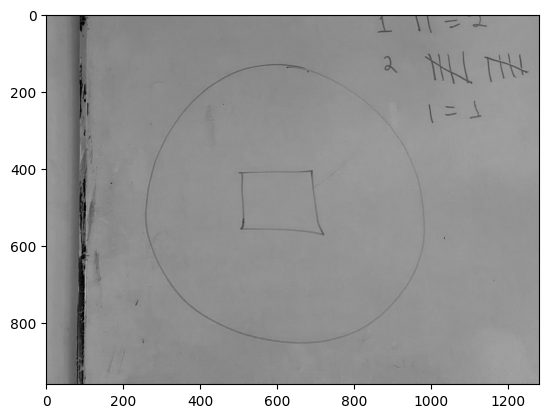

In [23]:
img = cv2.imread("./files/Android.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
image = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)
#image[:,:,2] = 20 # Changes the V value
# necesita estar en rgb para que funcione correctamente
plt.imshow(img2)

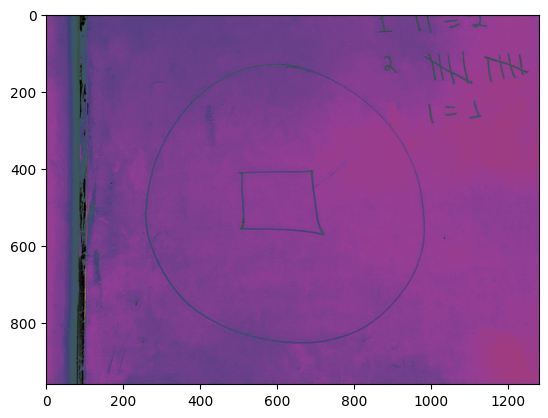

In [5]:
image2=cv2.cvtColor(img2, cv2.COLOR_HSV2RGB)
plt.imshow(image2)

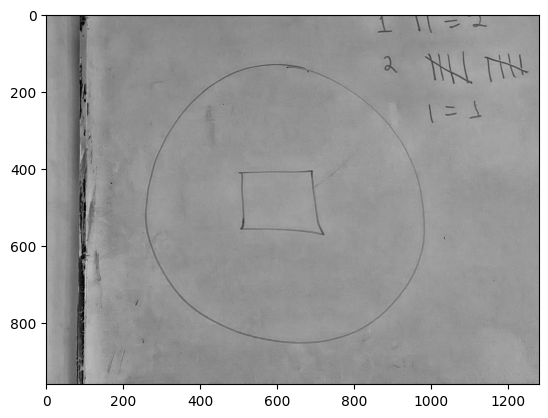

In [35]:
#ecualizar la imagen, tilegridesize es el tamaño de mi mascara que ira pasando por la imagen
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(20,20))
cl1 = clahe.apply(img)
imgeq = cv2.cvtColor(cl1, cv2.COLOR_GRAY2RGB)
plt.imshow(imgeq)

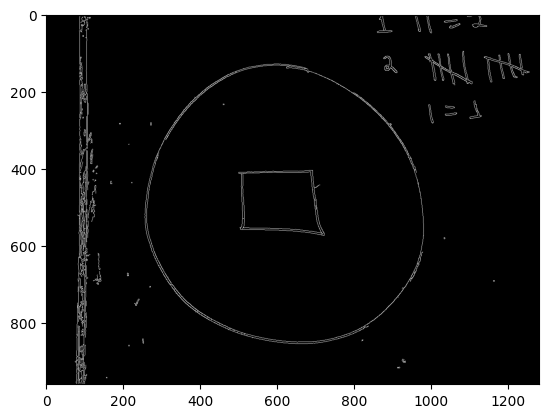

In [40]:
edges = cv2.Canny(imgeq,70,255)
plt.imshow(edges, cmap='gray')

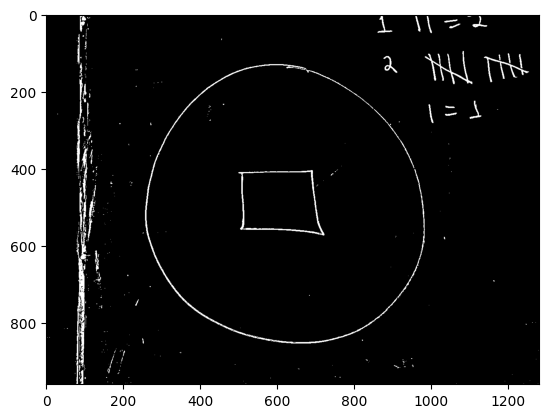

In [59]:
# el 15 es la mascara cuadrada, el otro el umbral
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,19,10)
th2 = cv2.cvtColor(th2, cv2.COLOR_GRAY2RGB)
plt.imshow(th2)

In [65]:
def auto_canny(image, sigma=0.40):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
 
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
 
	# return the edged image
	return edged

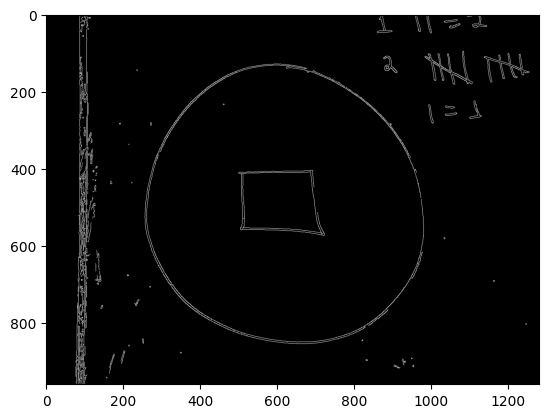

In [66]:
newedge = auto_canny(imgeq)
newedge = cv2.cvtColor(newedge, cv2.COLOR_GRAY2RGB)
plt.imshow(newedge)

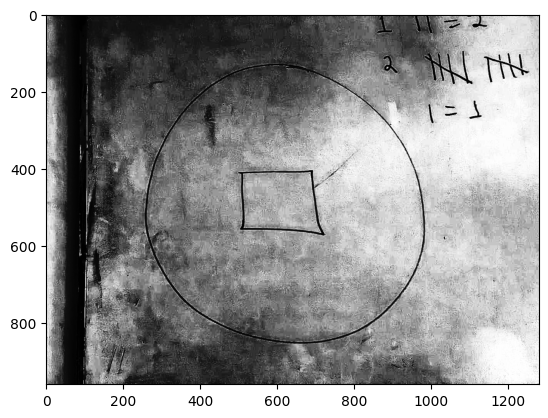

In [67]:
res = cv2.equalizeHist(img)
res2 = cv2.cvtColor(res, cv2.COLOR_GRAY2RGB)
plt.imshow(res2)

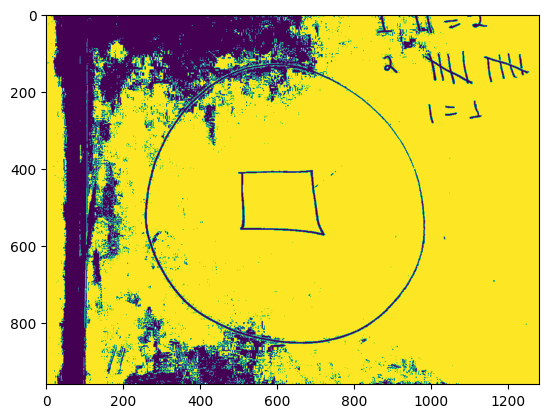

In [70]:
th2, dst2 = cv2.threshold(res, 50, 255, cv2.THRESH_BINARY)

plt.imshow(dst2)

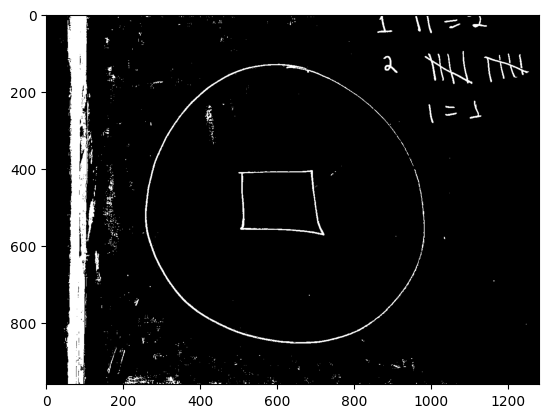

In [77]:
th2, dst3 = cv2.threshold(imgeq, 130, 255, cv2.THRESH_BINARY_INV)
plt.imshow(dst3)